# Workforce flow. EDA. Part 2.

| Feature                     | Decision | Reason |
|-----------------------------|---------------------------|--------|
| search_term                 | ❌ Exclude                   | Not relevant for career transitions. |
| id                          | ✅ Include                   | Unique identifier for individuals. |
| urn                         | ❌ Exclude                     | Internal LinkedIn identifier, not useful for analysis. |
| profile_link                | ❌ Exclude                     | Used for accessing profiles, not needed for visualization. |
| profile_id                  | ❌ Exclude                   | Redundant if `id` is included. |
| name                        | ✅ Include                   | Useful for labeling nodes. |
| first_name                  | ❌ Exclude                     | Redundant since `name` includes it. |
| last_name                   | ❌ Exclude                     | Redundant since `name` includes it. |
| location                    | ✅ Include                   | Can be used for geographic career trend analysis. |
| headline                    | ❌ Exclude                     | Mostly personal branding, not structured enough for transitions. |
| estimated_age               | ✅ Include                   | Helps analyze career trends by age group. |
| followers                   | ❌ Exclude                     | Not relevant for career transitions. |
| connections                 | ❌ Exclude                     | Not directly related to career movement. |
| mutuals                     | ❌ Exclude                     | More relevant for networking analysis than career transitions. |
| is_connection               | ❌ Exclude                     | Not relevant for the project's focus. |
| premium                     | ❌ Exclude                     | Subscription status does not impact career transitions. |
| creator                     | ❌ Exclude                     | Not relevant to job transitions. |
| influencer                  | ❌ Exclude                     | Not directly related to career shifts. |
| open_to_work                | ❌ Exclude                     | Represents intent rather than actual transitions. |
| is_hiring                   | ❌ Exclude                     | Not useful for visualizing career paths. |
| current_position            | ❌ Exclude                     | Key information for career transitions, but presents in `experience`. |
| current_company             | ❌ Exclude                     | Essential for visualizing company-based career shifts, but presents in `experience`. |
| past_company_1              | ❌ Exclude                     | Helps track career transitions, but presents in `experience`. |
| past_company_2              | ❌ Exclude                     | Useful for analyzing multiple career moves, but presents in `experience`. |
| school_1                    | ❌ Exclude                     | Important for educational background insights, but presents in `schools`. |
| school_2                    | ❌ Exclude                     | Less relevant than primary school/university, and presents in `schools`. |
| top_skill_1                 | ❌ Exclude                     | Presents in `skills`. |
| top_skill_2                 | ❌ Exclude                     | Presents in `skills`. |
| top_skill_3                 | ❌ Exclude                     | Presents in `skills`. |
| bio                         | ❌ Exclude                     | Unstructured text, not useful for transitions. |
| experiences                 | ✅ Include                   | Key to tracking career progression. |
| schools                     | ✅ Include                   | Helps in educational background analysis. |
| skills                      | ✅ Include                   | Valuable for skill-based career trends. |
| certifications              | ✅ Include                   | Adds information about professional development. |
| languages                   | ❌ Exclude                     | Not directly related to career transitions. |
| emails_in_bio               | ❌ Exclude                     | Not relevant and contains privacy concerns. |
| potential_emails            | ❌ Exclude                     | No data available and privacy-sensitive. |
| profile_photo               | ❌ Exclude                     | Not necessary for visualizing transitions. |
| banner_photo                | ❌ Exclude                     | Not useful for analysis. |
| connection_created_at       | ❌ Exclude                     | Irrelevant for career transitions. |
| connection_email            | ❌ Exclude                     | Privacy-sensitive and unnecessary. |
| connection_phone_numbers    | ❌ Exclude                     | Privacy-sensitive, not useful. |
| connection_websites         | ❌ Exclude                     | Not relevant for career transitions. |
| connection_street_address   | ❌ Exclude                     | No data available, not relevant. |
| connection_birthday         | ❌ Exclude                     | Not necessary for career transitions. |

## Loading data

In [1]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=1dea36b4e768d8ff7540598f405524a335ebe64fd4ad75a46fec4df3c64fac0c
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from googletrans import Translator
import re
import requests
from tqdm import tqdm

### LinkedIn Data

In [2]:
data_1 = 'data_1/'
data_2 = 'data_2/'

# Concatenate all dataframes into one common users dataframe
users = pd.concat([pd.read_csv(f'{data_1}users_0_100.csv'),
                   pd.read_csv(f'{data_1}users_100_200.csv'),
                   pd.read_csv(f'{data_1}users_200_300.csv'),
                   pd.read_csv(f'{data_1}users_300_400.csv'),
                   pd.read_csv(f'{data_1}users_400_500.csv'),
                   pd.read_csv(f'{data_1}users_500_550.csv'),
                   pd.read_csv(f'{data_1}users_550_552.csv'),
                   pd.read_csv(f'{data_1}users_552_600.csv'),
                   pd.read_csv(f'{data_1}users_600_700.csv'),
                   pd.read_csv(f'{data_1}users_700_745.csv'),
                   pd.read_csv(f'{data_1}users_745_843.csv'),
                   pd.read_csv(f'{data_2}users_0_31.csv'),
                   pd.read_csv(f'{data_2}users_31_103.csv'),
                   pd.read_csv(f'{data_2}users_103_155.csv'),
                   pd.read_csv(f'{data_2}users_155_228.csv'),
                   pd.read_csv(f'{data_2}users_228_294.csv'),
                   pd.read_csv(f'{data_2}users_294_363.csv'),
                   pd.read_csv(f'{data_2}users_363_406.csv'),
                   pd.read_csv(f'{data_2}users_406_477.csv'),
                   pd.read_csv(f'{data_2}users_477_517.csv'),
                   pd.read_csv(f'{data_2}users_517_560.csv'),
                   pd.read_csv(f'{data_2}users_560_684.csv'),
                   pd.read_csv(f'{data_2}users_684_793.csv'),
                   pd.read_csv(f'{data_2}users_793_838.csv'),
                   pd.read_csv(f'{data_2}users_838_893.csv'),
                   pd.read_csv(f'{data_2}users_893_924.csv')],
                  ignore_index=True)
users.head()

,search_term,id,urn,profile_link,profile_id,name,first_name,last_name,location,headline,...,emails_in_bio,potential_emails,profile_photo,banner_photo,connection_created_at,connection_email,connection_phone_numbers,connection_websites,connection_street_address,connection_birthday
0,manual,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,266161080,https://www.linkedin.com/in/ACoAAA_dS7gB-ucqa7...,roberto-enrique-chavez-rodriguez-4a017875,Roberto Enrique Chavez Rodriguez,Roberto Enrique,Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",Software Engineer at the Center of Oil and Gas...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4E03AQFZ...,https://media.licdn.com/dms/image/v2/C4E16AQF5...,NaN,NaN,[],[],NaN,May 29
1,manual,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,265756375,https://www.linkedin.com/in/ACoAAA_XHtcBA0rpWC...,maxim-shalavin,Maxim Shalavin,Maxim,Shalavin,"Tbilisi, Georgia",Team Lead | Senior Golang Developer | Blockcha...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/D4D03AQEQ...,https://media.licdn.com/dms/image/v2/D4D16AQEq...,NaN,NaN,[],['https://github.com/sansaian'],NaN,NaN
2,manual,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,260311431,https://www.linkedin.com/in/ACoAAA-ECYcB5_w3-S...,zaplatinaolga,Olga Z.,Olga,Z.,"Kazan, Tatarstan, Russia",Project management | internal communications |...,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4E03AQHl...,https://media.licdn.com/dms/image/v2/C4E16AQHR...,NaN,NaN,[],[],NaN,August 30
3,manual,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,221535739,https://www.linkedin.com/in/ACoAAA00XfsBNdzmLH...,fazullin,Timur Fazullin,Timur,Fazullin,"Innopolis, Tatarstan, Russia",Head of Communications and Branding,...,NaN,NaN,https://media.licdn.com/dms/image/v2/C4D03AQFF...,NaN,NaN,NaN,[],['https://fazullin.site/'],NaN,NaN
4,manual,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,218667241,https://www.linkedin.com/in/ACoAAA0ImOkB2Ninxe...,vasiliizorin,Vasilii Zorin,Vasilii,Zorin,"Toronto, Ontario, Canada",Lead Product Manager at Acronis,...,NaN,NaN,https://media.licdn.com/dms/image/v2/D4D03AQHz...,NaN,NaN,NaN,[],[],NaN,May 12


In [3]:
users.shape

(1764, 45)

In [4]:
users = users[['id', 'name', 'location', 'estimated_age',
               'experiences', 'skills', 'school_1', 'school_2']].copy()

In [5]:
# Check duplicated profile_id in dataset
users.duplicated(subset='id').sum()

np.int64(25)

In [6]:
users = users.drop_duplicates(subset='id', keep='first')

In [7]:
users.duplicated(subset='id').sum()

np.int64(0)

In [8]:
# Check duplicated profile_id in dataset
users.duplicated().sum()

np.int64(0)

In [9]:
users.head()

,id,name,location,estimated_age,experiences,skills,school_1,school_2
0,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,Roberto Enrique Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",35.0,"[{'start_date': '2022-01-14', 'end_date': '202...","[{'name': 'JavaScript', 'endorsements': 0, 'pa...",Innopolis University,Innopolis University
1,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,Maxim Shalavin,"Tbilisi, Georgia",34.0,"[{'start_date': '2023-04-14', 'end_date': None...","[{'name': 'Java', 'endorsements': 0, 'passed_a...",Innopolis University,Siberian State University of Telecommunication...
2,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,Olga Z.,"Kazan, Tatarstan, Russia",37.0,"[{'start_date': '2023-05-14', 'end_date': None...","[{'name': 'English', 'endorsements': 16, 'pass...",Tomsk Polytechnic University,Tomsk State University
3,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,Timur Fazullin,"Innopolis, Tatarstan, Russia",40.0,"[{'start_date': '2024-10-14', 'end_date': None...","[{'name': 'Контент-маркетинг', 'endorsements':...",XYZ,Skillbox
4,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,Vasilii Zorin,"Toronto, Ontario, Canada",31.0,"[{'start_date': '2023-11-14', 'end_date': None...","[{'name': 'Scrum', 'endorsements': 14, 'passed...",National University of Singapore,Innopolis University


In [10]:
users.shape

(1739, 8)

In [11]:
# Calculate percentage of missing values in all columns
for column in users.columns:
    missing_percentage = (users[column].isnull().sum() / users.shape[0]) * 100
    print(f'Percentage of missing values in \'{column}\' column: {round(missing_percentage, 3)}%')

Percentage of missing values in 'id' column: 0.0%
Percentage of missing values in 'name' column: 0.0%
Percentage of missing values in 'location' column: 0.23%
Percentage of missing values in 'estimated_age' column: 3.335%
Percentage of missing values in 'experiences' column: 4.888%
Percentage of missing values in 'skills' column: 8.683%
Percentage of missing values in 'school_1' column: 0.633%
Percentage of missing values in 'school_2' column: 29.27%


In [12]:
# Fill missing values in location
users.fillna({'location': 'no location', 'school_1': 'no', 'school_2': 'no'}, inplace=True)

In [13]:
# Fill missing list values separately
for col in ['experiences', 'skills']:
    users[col] = users[col].apply(lambda x: [] if pd.isna(x) else x)

### UI Dataset

In [14]:
IU_dataset = pd.read_excel('IU_dataset.xlsx', header=2)
IU_dataset

,Анкета трудоустройства.Дата,Организация,Должность,Дата трудоустройства,ID
0,09.11.2020 16:31:47,Ситроникс Телеком Солюшнс (МТС),Ведущий инженер,28.06.2019,1
1,30.12.2020 10:14:56,Маркетплейс-технологии,Андроид-разработчик,15.12.2020,2
2,09.11.2020 16:36:52,Тинькофф,Младший разработчик,13.07.2020,3
3,26.11.2020 16:10:04,Тинькофф,Младший разработчик,13.07.2020,3
4,09.11.2020 16:33:01,Университет Иннополис,Разработчик машинного обучения,14.09.2020,4
...,...,...,...,...,...
434,19.04.2021 15:02:09,Тинькофф,Генеральный директор,04.11.2020,373
435,21.09.2021 04:48:53,Интеллектуальная видеоаналитика,"Ассистент магистерской программы ""Разработка б...",04.07.2021,374
436,15.01.2022 08:30:33,Яндекс,Программист 1 категории,20.11.2020,375
437,13.02.2021 21:06:24,ФИКС,Student,01.05.2019,376


In [15]:
IU_dataset.duplicated(subset=['Организация', 'Должность', 'Дата трудоустройства']).sum()

np.int64(37)

In [16]:
IU_dataset = IU_dataset.drop_duplicates(subset=['Организация', 'Должность', 'Дата трудоустройства'], keep='first').copy()

In [17]:
IU_dataset['id'] = IU_dataset['ID']

In [18]:
IU_dataset['name'] = [f"Student {id}" for id in IU_dataset['ID']]

In [19]:
IU_dataset['location'] = ["no location" for _ in range(IU_dataset.shape[0])]

In [20]:
IU_dataset['estimated_age'] = [np.nan for _ in range(IU_dataset.shape[0])]

In [21]:
def create_experiences(row):
    if "." in str(row['Дата трудоустройства']):
        day, month, year = str(row['Дата трудоустройства']).split(".")
    else:
        year, month, day = str(row['Дата трудоустройства']).split("-")
        day = day.split(" ")[0]

    return str([{'start_date': year+"-"+month+"-"+day, 'end_date': None, 'title': row['Должность'], 'company': row['Организация']}])

IU_dataset['experiences'] = IU_dataset.apply(create_experiences, axis=1)

In [22]:
IU_dataset['skills'] = [[] for _ in range(IU_dataset.shape[0])]

In [23]:
IU_dataset['school_1'] = ["Innopolis University" for _ in range(IU_dataset.shape[0])]
IU_dataset['school_2'] = ["no" for _ in range(IU_dataset.shape[0])]

In [24]:
IU_dataset.drop(columns=['Анкета трудоустройства.Дата', 'ID', 'Дата трудоустройства', 'Должность', 'Организация'], inplace=True)

In [25]:
IU_dataset

,id,name,location,estimated_age,experiences,skills,school_1,school_2
0,1,Student 1,no location,NaN,"[{'start_date': '2019-06-28', 'end_date': None...",[],Innopolis University,no
1,2,Student 2,no location,NaN,"[{'start_date': '2020-12-15', 'end_date': None...",[],Innopolis University,no
2,3,Student 3,no location,NaN,"[{'start_date': '2020-07-13', 'end_date': None...",[],Innopolis University,no
4,4,Student 4,no location,NaN,"[{'start_date': '2020-09-14', 'end_date': None...",[],Innopolis University,no
5,4,Student 4,no location,NaN,"[{'start_date': '2020-09-14', 'end_date': None...",[],Innopolis University,no
...,...,...,...,...,...,...,...,...
434,373,Student 373,no location,NaN,"[{'start_date': '2020-11-04', 'end_date': None...",[],Innopolis University,no
435,374,Student 374,no location,NaN,"[{'start_date': '2021-07-04', 'end_date': None...",[],Innopolis University,no
436,375,Student 375,no location,NaN,"[{'start_date': '2020-11-20', 'end_date': None...",[],Innopolis University,no
437,376,Student 376,no location,NaN,"[{'start_date': '2019-05-01', 'end_date': None...",[],Innopolis University,no


### Joining Datasets

In [26]:
users.shape

(1739, 8)

In [27]:
IU_dataset.shape

(402, 8)

In [28]:
users = pd.concat([users, IU_dataset], ignore_index=True)
users.shape

(2141, 8)

## Language Standardization

In [29]:
# Initialize the translator
translator = Translator()

# Apply progress bar to dataframe
tqdm.pandas()

# Function to translate text to English
def translate_to_english(text):

    # Detect non-English characters
    if text and not text.isascii():
        try:
            return translator.translate(text, dest='en').text
        except:
            return text
    return text

## "Experiences" column

In [95]:
import ast

# Create list for users experiences
users_experiences = []

# Go through users['experiences'] to convert it in proper format
for experiences in users['experiences']:
    # If experience is empty, then skip it
    if len(experiences) == 0:
        users_experiences.append([])
        continue
    # print(experiences)
    # Convert the string to a list
    data_list = ast.literal_eval(experiences)
    user_experiences = []

    # Store only dates, position, company name, and work type (full time, part time, and etc.)
    for experience in data_list:
        user_experience = {'start_date': experience['start_date'],
                            'end_date': experience['end_date'],
                            'title': experience['title'],
                            'company': experience['company'],
                            # 'emp_type': experience['emp_type']
                            }

        user_experiences.append(user_experience)
    users_experiences.append(user_experiences)

In [96]:
# Extract only unique positions for language standartization
titles = set()
companies = set()
for experiences in users_experiences:
    for experience in experiences:
        titles.add(experience['title'])
        companies.add(experience['company'])

In [97]:
len(titles)

4093

In [98]:
len(companies)

4494

In [99]:
titles_list = list(titles)
companies_list = list(companies)

In [35]:
# Translate to English all positions and store its translation
translated_titles = {}
for title in tqdm(titles_list):
    translated_titles[title] = translate_to_english(title)


100%|██████████| 4093/4093 [08:47<00:00,  7.76it/s]


In [36]:
# Translate to English all company names and store its translation
translated_companies = {}
for company in tqdm(companies_list):
    translated_companies[company] = translate_to_english(company)

100%|██████████| 4494/4494 [10:06<00:00,  7.41it/s]


In [100]:
# Convert positions and companies in dataframe to English version
for experiences in users_experiences:
    for experience in experiences:
        experience['title'] = translated_titles[experience['title']]
        experience['company'] = translated_companies[experience['company']]

In [101]:
# Assign new experiences column
users['experiences'] = users_experiences

In [102]:
users['experiences'][2000]

[{'start_date': '2021-05-20',
  'end_date': None,
  'title': 'Developer interpreter',
  'company': 'Portavita'}]

## "Skills" column

In [106]:
users['skills'][0]

"[{'name': 'JavaScript', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Liquibase Community Edition', 'endorsements': 0, 'passed_assessment': None}, {'name': 'SQL', 'endorsements': 0, 'passed_assessment': None}, {'name': 'REST APIs', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Git', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Java', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Spring Framework', 'endorsements': 0, 'passed_assessment': None}, {'name': 'PostgreSQL', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Hibernate', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Docker Products', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Swagger API', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Apache Kafka', 'endorsements': 0, 'passed_assessment': None}, {'name': 'RabbitMQ', 'endorsements': 0, 'passed_assessment': None}, {'name': 'Java Database Connectivity (JDBC)', 'endorsements': 0, 'passed_assessme

In [109]:
# Create list for users skills
users_skills = []

# Go through users['skills'] to convert it in proper format
for skills in tqdm(users['skills'], total=users.shape[0]):
    # If skills is empty, then skip it
    if len(skills) == 0:
        users_skills.append([])
        continue
    # Convert the string to a list
    data_list = ast.literal_eval(skills)
    user_skills = []

    # Store only name of skills
    for skills_from_user in data_list:
        user_skills.append(translate_to_english(skills_from_user['name']))
    users_skills.append(user_skills)

100%|██████████| 2141/2141 [21:01<00:00,  1.70it/s]


In [110]:
users['skills'] = users_skills

## Difference in month

In [116]:
from datetime import datetime
counter = 0
for experiences in tqdm(users['experiences'], total=users.shape[0]):
    for experience in experiences:
        start_date = pd.to_datetime(experience['start_date']) if experience['start_date'] else pd.to_datetime(datetime.today())
        end_date = pd.to_datetime(experience['end_date']) if experience['end_date'] else pd.to_datetime(datetime.today())
        # Calculate full month difference
        months = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)

        # Consider partial months
        if end_date.day < start_date.day:
            months -= 1

        if months == 0:
            counter += 1
        experience["duration"] = months

100%|██████████| 2141/2141 [00:09<00:00, 234.63it/s]


In [117]:
counter

141

In [118]:
users.head()

,id,name,location,estimated_age,experiences,skills
0,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,Roberto Enrique Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",35.0,"[{'start_date': '2022-01-14', 'end_date': '202...","[JavaScript, Liquibase Community Edition, SQL,..."
1,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,Maxim Shalavin,"Tbilisi, Georgia",34.0,"[{'start_date': '2023-04-14', 'end_date': None...","[Java, Android Development, Docker, Docker Pro..."
2,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,Olga Z.,"Kazan, Tatarstan, Russia",37.0,"[{'start_date': '2023-05-14', 'end_date': None...","[English, Translation Eng<->Rus, Graduate Recr..."
3,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,Timur Fazullin,"Innopolis, Tatarstan, Russia",40.0,"[{'start_date': '2024-10-14', 'end_date': None...","[Content marketing, Content management, Conten..."
4,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,Vasilii Zorin,"Toronto, Ontario, Canada",31.0,"[{'start_date': '2023-11-14', 'end_date': None...","[Scrum, Lean Software Development, Data Analys..."


In [29]:
users.to_csv('users.csv', index=False)

In [121]:
# Convert to JSON and save
users.to_json("users.json", orient="records", indent=4)

## Job position clusterization

In [3]:
users = pd.read_csv('users.csv')

In [4]:
users.head()

,id,name,location,estimated_age,experiences,skills
0,ACoAAA_dS7gB-ucqa7BZwzbO1-kVxInduE2bsOg,Roberto Enrique Chavez Rodriguez,"Buenos Aires, Buenos Aires Province, Argentina",35.0,"[{'start_date': '2022-01-14', 'end_date': '202...","['JavaScript', 'Liquibase Community Edition', ..."
1,ACoAAA_XHtcBA0rpWCcoM3yhkMOy04zzSKnd804,Maxim Shalavin,"Tbilisi, Georgia",34.0,"[{'start_date': '2023-04-14', 'end_date': None...","['Java', 'Android Development', 'Docker', 'Doc..."
2,ACoAAA-ECYcB5_w3-SWAt3dPl2KOOSo7kA9NyfI,Olga Z.,"Kazan, Tatarstan, Russia",37.0,"[{'start_date': '2023-05-14', 'end_date': None...","['English', 'Translation Eng<->Rus', 'Graduate..."
3,ACoAAA00XfsBNdzmLH9mWWzP5jgdk-nu0YdDFRo,Timur Fazullin,"Innopolis, Tatarstan, Russia",40.0,"[{'start_date': '2024-10-14', 'end_date': None...","['Content marketing', 'Content management', 'C..."
4,ACoAAA0ImOkB2Ninxe_GudoAdBSx1Lt0sKb4R5g,Vasilii Zorin,"Toronto, Ontario, Canada",31.0,"[{'start_date': '2023-11-14', 'end_date': None...","['Scrum', 'Lean Software Development', 'Data A..."


In [7]:
import ast

# Create list for users experiences
users_experiences = []

# Go through users['experiences'] to convert it in proper format
for experiences in users['experiences']:
    # If experience is empty, then skip it
    if len(experiences) == 0:
        users_experiences.append([])
        continue
    # print(experiences)
    # Convert the string to a list
    data_list = ast.literal_eval(experiences)
    users_experiences.append(data_list)

In [8]:
# Extract only unique positions for language standartization
titles = set()
for experiences in users_experiences:
    for experience in experiences:
        titles.add(experience['title'])

In [9]:
jobs = list(titles)

In [10]:
len(jobs)

4014

In [22]:
!pip install umap-learn

In [23]:
import umap.umap_ as umap
import torch
from sentence_transformers import SentenceTransformer
from matplotlib.lines import Line2D

### Using HuggingFaceEmbeddings

In [12]:
!pip install langchain langchain-community sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1

In [13]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.schema import Document
import torch

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [15]:
job_categories = ['Software Engineering',
                  'Data & Analytics',
                  'Infrastructure & Networks',
                  'Cloud & DevOps',
                  'Cybersecurity',
                  'Machine Learning & AI',
                  'Product & Project Management',
                  'IT Support & Administration',
                  'UI/UX & Design',
                  'Other']

In [16]:
model_kwargs = {'device': device}
embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-m3", model_kwargs=model_kwargs)

<ipython-input-16-78798befe74f>:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-m3", model_kwargs=model_kwargs)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [17]:
job_category_vectors = embedding_model.embed_documents(job_categories)

In [18]:
faiss_index = FAISS.from_texts(job_categories, embedding_model)

In [19]:
import json

# matching
job_categories_map = {}

for job in tqdm(jobs):
    category = faiss_index.similarity_search(job, k=1)[0].page_content
    job_categories_map[job] = category

100%|██████████| 4014/4014 [01:29<00:00, 44.64it/s]


In [35]:
import pickle

with open("job_categories_map.pkl", "wb") as f:
    pickle.dump(job_categories_map, f)

### Work with word embeddings

In [24]:
# Check if CUDA is available and set the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Load a pre-trained SentenceTransformer model on CUDA
model = SentenceTransformer('all-MiniLM-L6-v2').to(device)

# Convert abstracts to embeddings
embeddings = model.encode(jobs, convert_to_tensor=True, device=device)
embeddings = embeddings.cpu().numpy()  # Move back to CPU for UMAP
print("embeddings are ready!")

Using device: cuda


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

embeddings are ready!


In [25]:
# Reduce dimensionality using UMAP
reducer = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine')
embedding_2d = reducer.fit_transform(embeddings)
print("Reducing dimensionality is complete!")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Reducing dimensionality is complete!


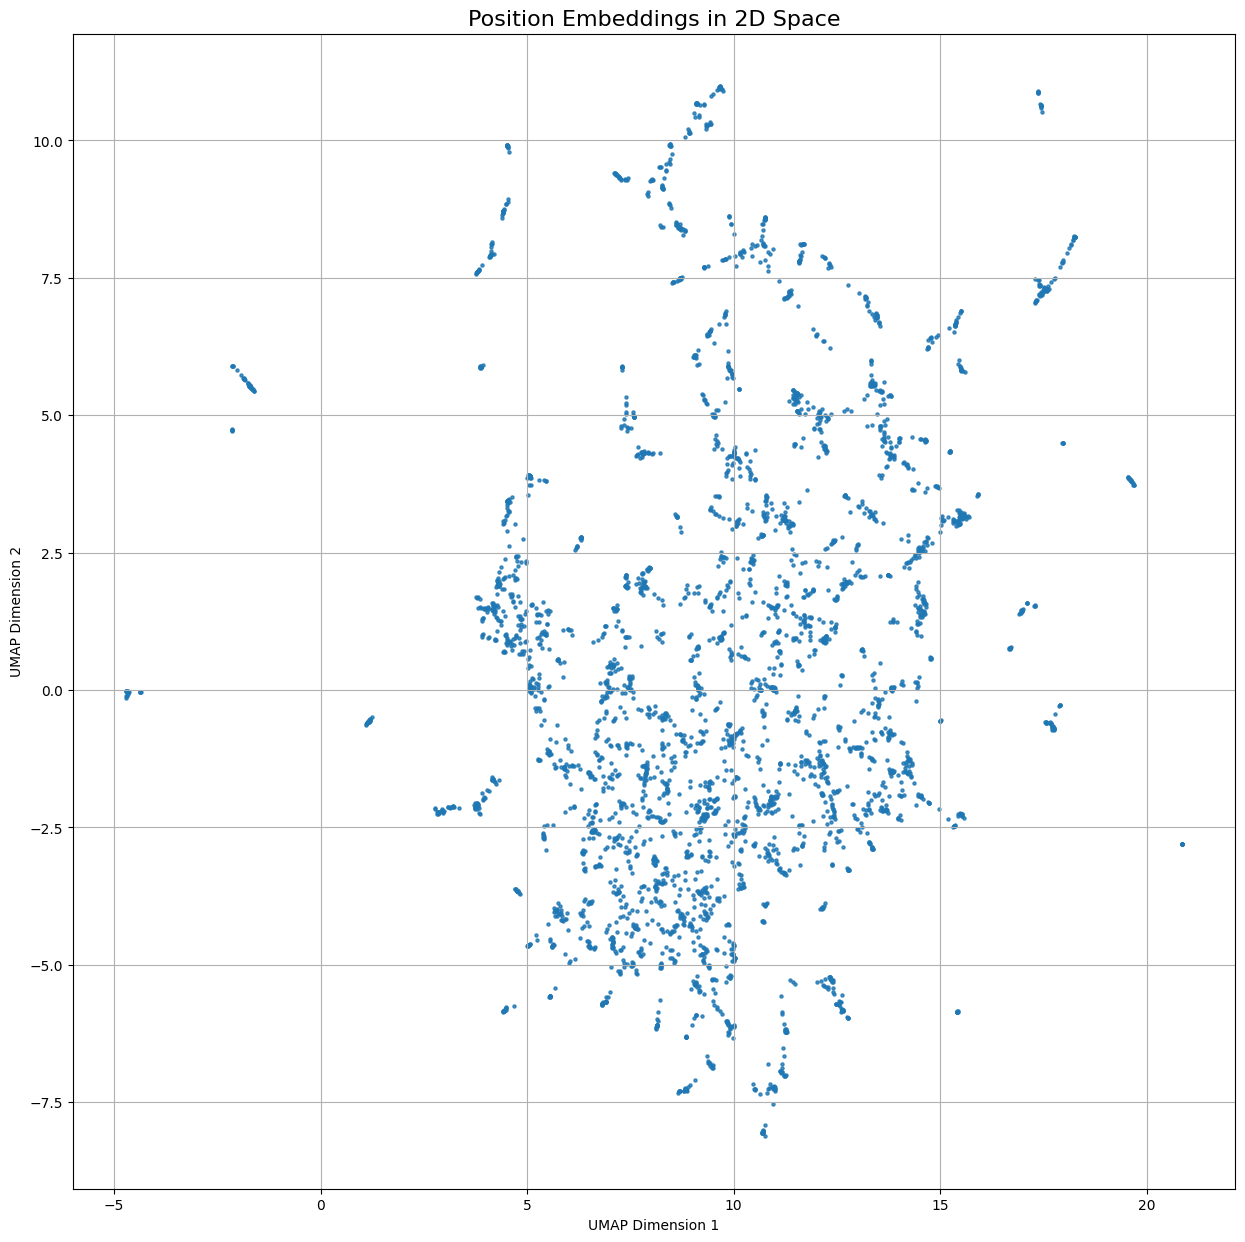

In [26]:
# Plot the embeddings
plt.figure(figsize=(15, 15))

# Use a colormap that supports many categories (e.g., 'tab20', 'gist_ncar')
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, alpha=0.8)

plt.title("Position Embeddings in 2D Space", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

#### KMean

In [27]:
# Apply clustering (choose an appropriate number of clusters)
from sklearn.cluster import KMeans

num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

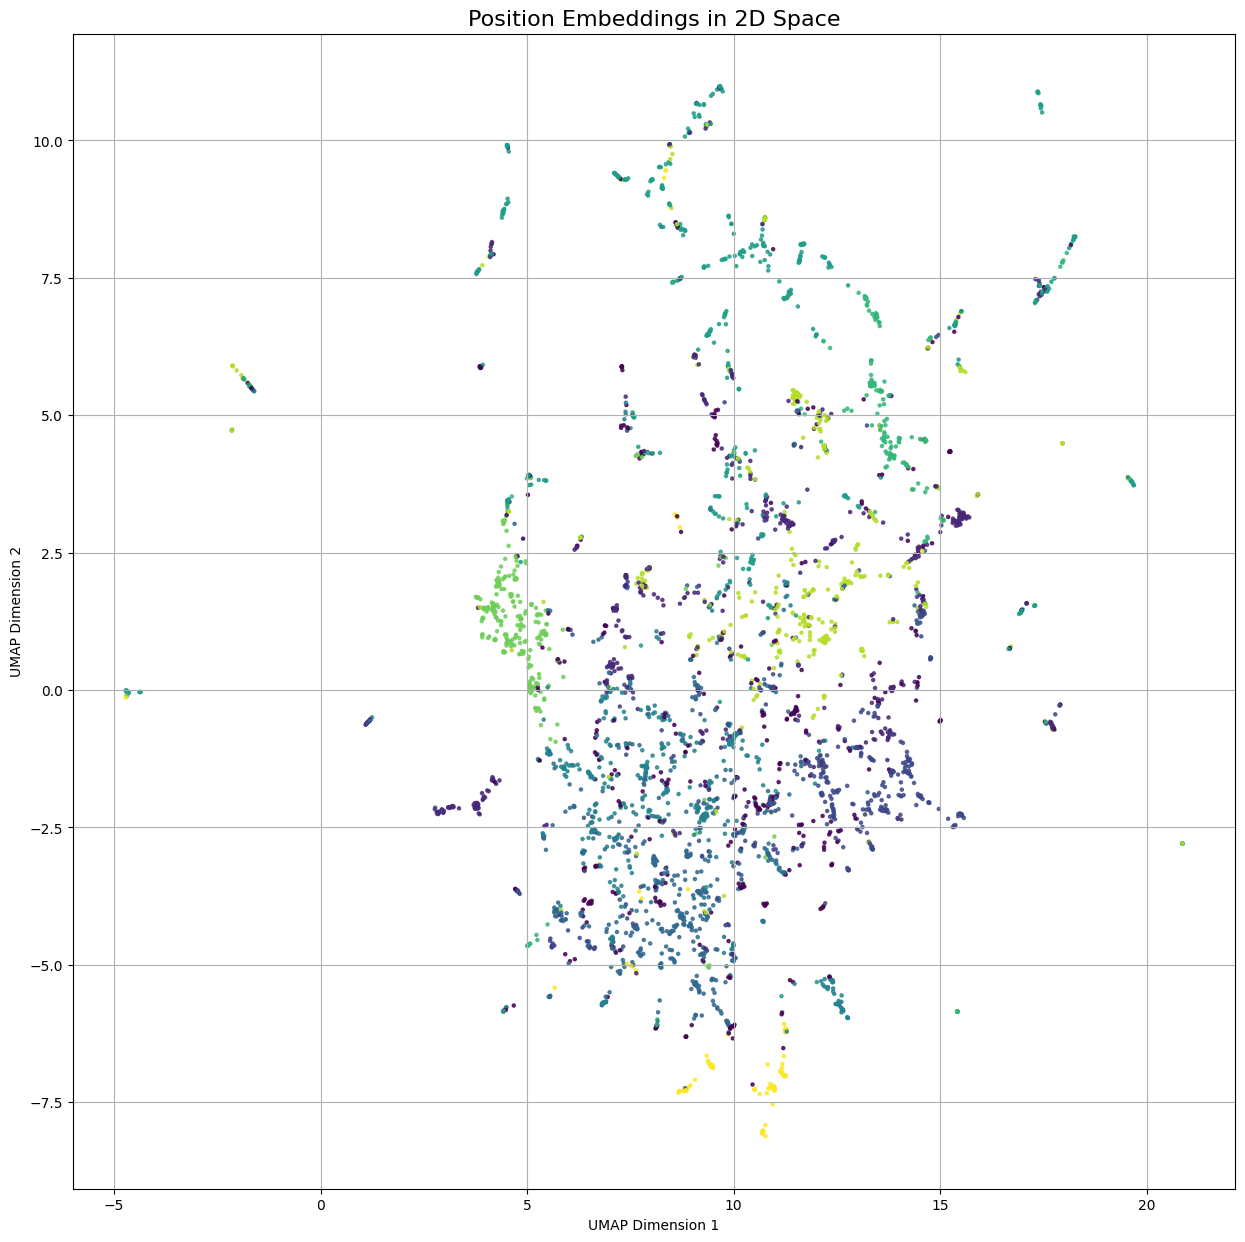

In [28]:
plt.figure(figsize=(15, 15))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, c=labels, alpha=0.8)

plt.title("Position Embeddings in 2D Space", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()

### Fuzzy matching

In [29]:
!pip install fuzzywuzzy

In [31]:
import spacy
from fuzzywuzzy import process

# Load spaCy NER model
nlp = spacy.load("en_core_web_sm")

# Define standard job title
STANDARD_JOB_TITLES = {"Software Development":0,
                       "Data Science & AI":1,
                       "Cybersecurity":2,
                       "Research & Academia":3,
                       "Operations & Management":4,
                       "Design & UX/UI":5,
                       "Marketing & Sales":6
                       }


def standardize_title(title):
    """Finds the closest match for a job title from the predefined standard titles."""
    match, score = process.extractOne(title, STANDARD_JOB_TITLES.keys())
    return STANDARD_JOB_TITLES[match]


labels = []
# Clusterize job titles
for job in tqdm(jobs, total=len(jobs)):
    labels.append(standardize_title(job))


100%|██████████| 4014/4014 [00:11<00:00, 336.68it/s]


In [33]:
# Print job titles with assigned clusters
for job, label in zip(jobs, labels):
    if label == 1:
        print(f"{job}: Cluster {label}")

Product Specialist, Carbon Nervous System: Cluster 1
Robotics Engineer | Robotics Instructor: Cluster 1
Data Mining Enginner: Cluster 1
Middle IT Recruiter: Cluster 1
CEO: Cluster 1
Senior Data Scientist, CIB Segment: Cluster 1
Junior Python Developer & Data Scientist: Cluster 1
The head of the sector: Cluster 1
Head of Service Science and Engineering lab: Cluster 1
Computer Science Consultant: Cluster 1
Associate Service Delivery Manager: Cluster 1
President of National Society of Black Engineers (NSBE) UMassD Chapter: Cluster 1
Cryptocurrency Arbitrage: Cluster 1
ML Engineer/Data Scientist/Web developer - Freelance: Cluster 1
Chief Product Officer BigData : Cluster 1
Deputy Chief Technology Officer: Cluster 1
Head of international scientific and technical cooperation: Cluster 1
Data scientist: Cluster 1
Director, Center for autonomous technologies: Cluster 1
Senior Researcher, Algorithm Developer, Data Analyst: Cluster 1
Ingeneer of Heating, Ventilation and Air-Conditioning: Cluster 

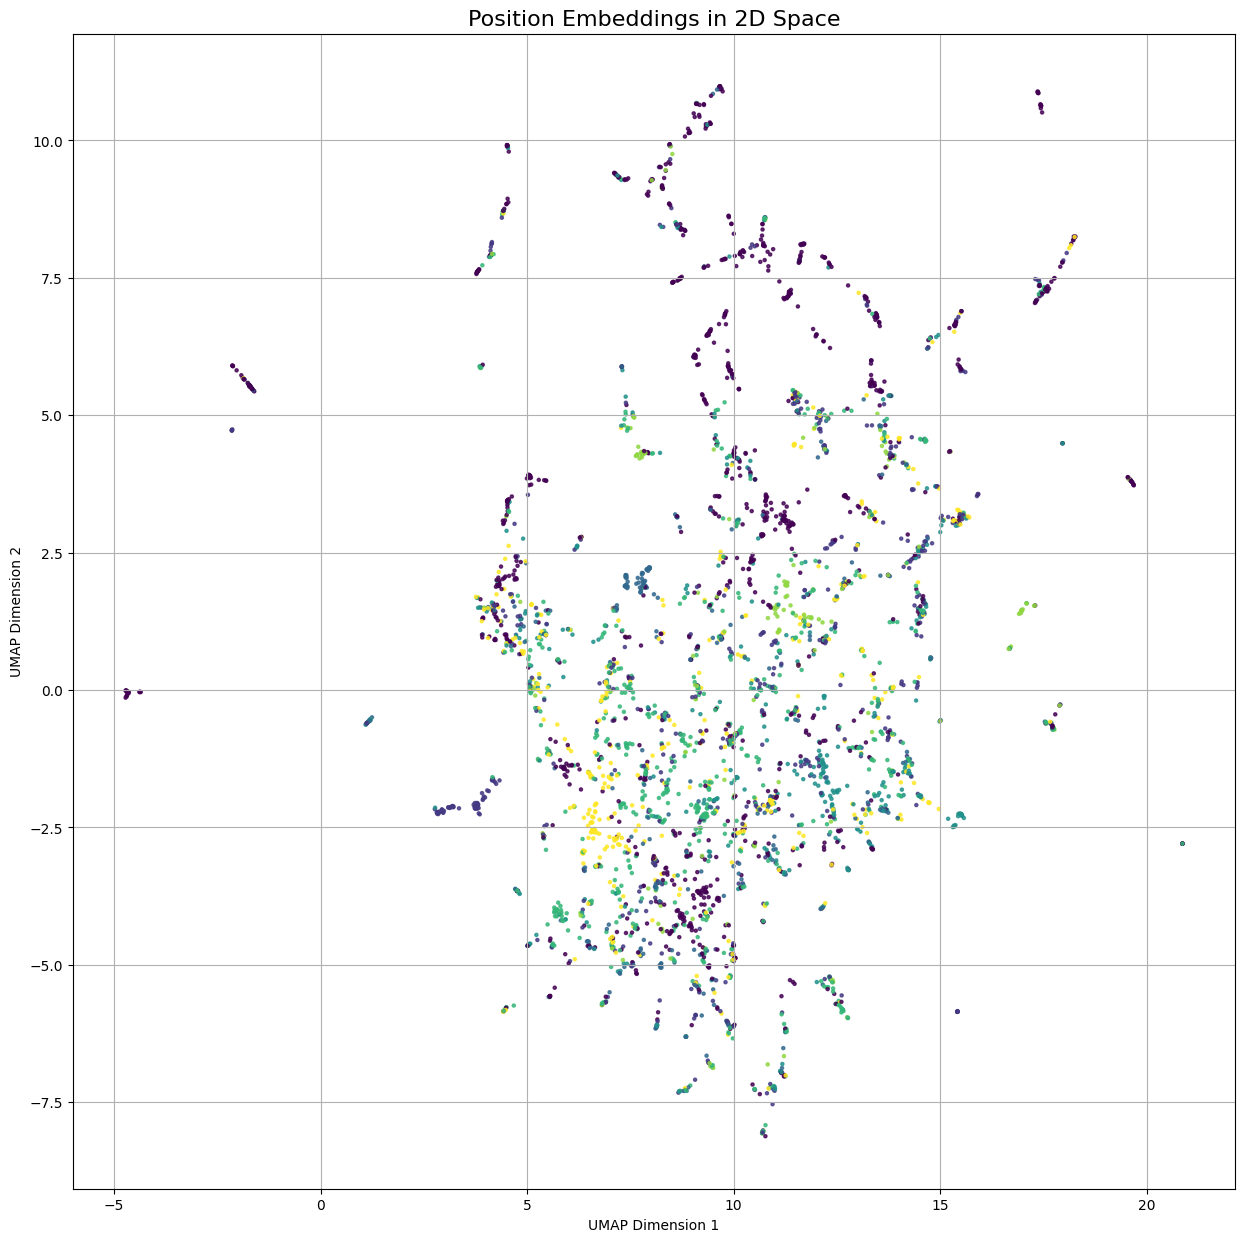

In [34]:
plt.figure(figsize=(15, 15))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=5, c=labels, alpha=0.8)

plt.title("Position Embeddings in 2D Space", fontsize=16)
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.grid(True)
plt.show()